In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

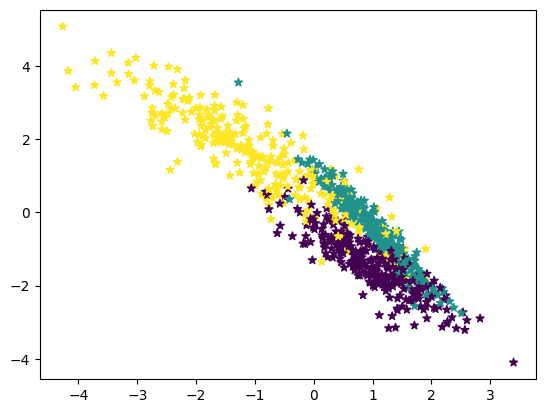

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [9]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [10]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


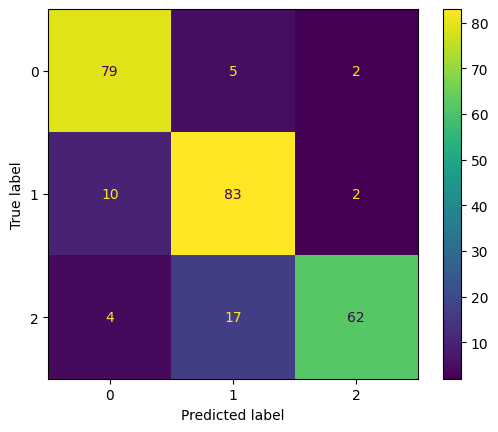

In [11]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

with loan data


In [19]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()

# Read CSV file (get the uploaded filename dynamically)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Display first 5 rows
df.head()


Saving loan_data_set.csv to loan_data_set.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


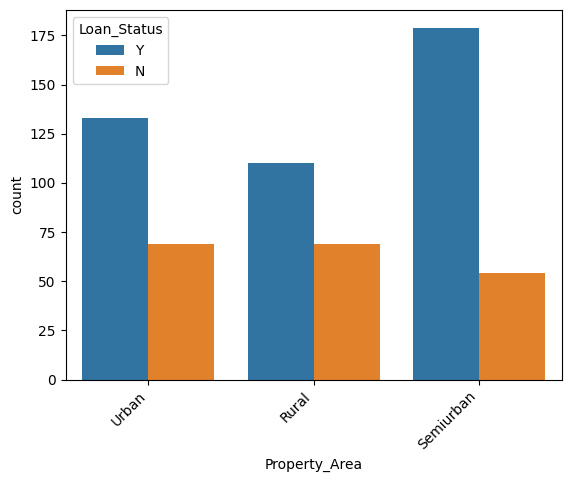

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Property_Area', hue='Loan_Status')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
# Apply one-hot encoding to 'Property_Area'
pre_df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

# Display first 5 rows
pre_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,False,True
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,False,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,False,True
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,False,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,False,True


In [26]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = pre_df.drop('Loan_Status', axis=1)  # Features
y = pre_df['Loan_Status']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 13), (123, 13), (491,), (123,))

In [30]:
# Drop Loan_ID only if it exists
if 'Loan_ID' in df.columns:
    df.drop(columns=['Loan_ID'], inplace=True)

# Handle missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
df[:] = imputer.fit_transform(df)

# Convert categorical columns to numeric
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for col in categorical_columns:
    if col in df.columns:  # Check if column exists before encoding
        df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target
X = df.drop(columns=['Loan_Status'])  # Features
y = df['Loan_Status']  # Target (encoded as 0 or 1)

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.78


In [31]:
from sklearn.metrics import accuracy_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.7804878048780488
F1 Score: 0.8524590163934426
